No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


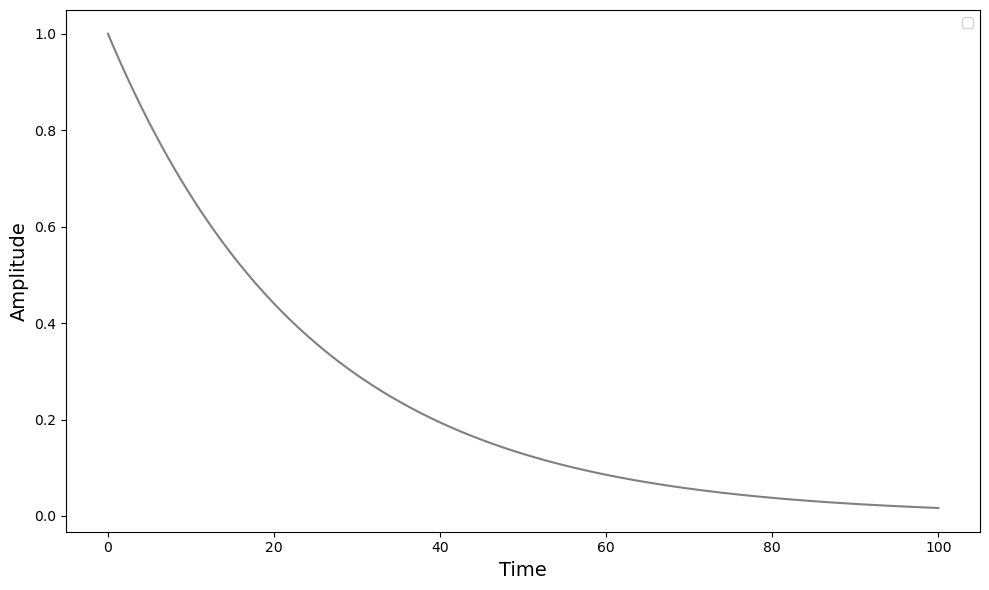

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_spins = 1000           # number of decay processes (spins)
num_time_points = 500      # resolution in time
time_max = 100              # max time
interaction_strength = 0.03 # sets scale of the coupling A in gamma = A / r^6

# Time array
t = np.linspace(0, time_max, num_time_points)

# Step 1: Sample distances from Poisson-distributed nearest neighbors in 3D
# PDF of nearest neighbor distance in 3D Poisson process: p(r) ∝ r^2 * exp(-c r^3)
# We can sample from the *CDF*: P(r) = 1 - exp(-c r^3) ⇒ r = ( -ln(U)/c )^{1/3}
U = np.random.rand(num_spins)
c = 1.0  # controls density
r = (-np.log(U) / c)**(1/3)

# Step 2: Compute decay rates: gamma = A / r^6
gamma = interaction_strength / r**6

# Step 3: Compute individual exponential decays
decays = np.exp(-np.outer(gamma, t))  # shape (num_spins, num_time_points)

# Step 4: Average over all decays
average_decay = np.mean(decays, axis=0)

# Plot
plt.figure(figsize=(10, 6))

# Plot a few individual decays
# for i in range(100):
plt.plot(t, decays[0], alpha=1, label='Individual' if i == 0 else "", color='gray')

# Plot the average
# plt.plot(t, average_decay, label='Average Decay', color='red', linewidth=2)

# plt.yscale('log')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)
# plt.title('Average of Exponentials with $\\gamma \\propto 1/r^6$ from Poisson Distribution')
plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.show()
